In [10]:
import pandas as pd
import numpy as np

# read data
eassy = pd.read_csv('essays.csv',sep = ',')
essay = eassy[['TEXT','cEXT','cNEU','cAGR','cCON','cOPN']]
df_essay = essay.rename(columns={'TEXT':'utterance'})

In [11]:
# plot personality counts
df_labels = df_essay[['cAGR','cCON','cEXT','cOPN','cNEU']]
df_counts = pd.DataFrame([])
df_counts['AGR'] = df_labels['cAGR'].value_counts().reset_index()['cAGR']
df_counts['CON'] = df_labels['cCON'].value_counts().reset_index()['cCON']
df_counts['EXT'] = df_labels['cEXT'].value_counts().reset_index()['cEXT']
df_counts['OPN'] = df_labels['cOPN'].value_counts().reset_index()['cOPN']
df_counts['NEU'] = df_labels['cNEU'].value_counts().reset_index()['cNEU']
df_counts

,AGR,CON,EXT,OPN,NEU
0,1310,1253,1276,1271,1234
1,1157,1214,1191,1196,1233


In [26]:
print((df_counts[0:1]/df_counts.sum()).round(decimals=3))
print((df_counts[1:2]/df_counts.sum()).round(decimals=3))

         AGR    CON    EXT    OPN  NEU
False  0.531  0.508  0.517  0.515  0.5
        AGR    CON    EXT    OPN  NEU
True  0.469  0.492  0.483  0.485  0.5


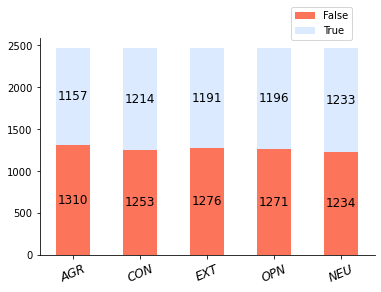

In [13]:
# plot data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize

import seaborn as sns

df_counts.index = (['False', 'True'])
ax = df_counts.T.plot.bar(stacked=True, color=['#FC7459', '#DBEAFF'])
# ax.color_palette("pastel")
# annotate the bars
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

ax.set_xticklabels(df_counts.columns, rotation=23, fontsize=12, fontstyle='oblique', fontweight='550')
ax.legend(bbox_to_anchor=(0.75, 0.99), loc=0, borderaxespad=0.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.savefig('plot/essay_personality.png', dpi=300)


In [16]:
df_essay['sample_length'] = df_essay['utterance'].apply(lambda x: len(x.split(' ')))
df_essay['sample_length'].describe()

count    2467.000000
mean      662.411836
std       266.557074
min        34.000000
25%       479.500000
50%       637.000000
75%       815.000000
max      3836.000000
Name: sample_length, dtype: float64

In [15]:
# split data and output tsv
labels_map = {'n':0,'y':1}
for index, row in df_essay.iteritems():
    if index == 'cEXT':
        df_essay_E = df_essay[['utterance','cEXT']]
        df_essay_E.rename(columns={'cEXT':'labels'},inplace=True)
        df_essay_E['labels'] = df_essay_E['labels'].map(labels_map)
        df_essay_E.to_csv('Essay_E_whole.tsv',sep = '\t')
    elif index == 'cNEU':
        df_essay_N = df_essay[['utterance','cNEU']]
        df_essay_N.rename(columns={'cNEU':'labels'},inplace=True)
        df_essay_N['labels'] = df_essay_N['labels'].map(labels_map)
        df_essay_N.to_csv('Essay_N_whole.tsv',sep = '\t')
    elif index == 'cAGR':
        df_essay_A = df_essay[['utterance','cAGR']]
        df_essay_A.rename(columns={'cAGR':'labels'},inplace=True)
        df_essay_A['labels'] = df_essay_A['labels'].map(labels_map)
        df_essay_A.to_csv('Essay_A_whole.tsv',sep = '\t')
    elif index == 'cCON':
        df_essay_C = df_essay[['utterance','cCON']]
        df_essay_C.rename(columns={'cCON':'labels'},inplace=True)
        df_essay_C['labels'] = df_essay_C['labels'].map(labels_map)
        df_essay_C.to_csv('Essay_C_whole.tsv',sep = '\t')
    elif index == 'cOPN':
        df_essay_O = df_essay[['utterance','cOPN']]
        df_essay_O.rename(columns={'cOPN':'labels'},inplace=True)
        df_essay_O['labels'] = df_essay_O['labels'].map(labels_map)
        df_essay_O.to_csv('Essay_O_whole.tsv',sep = '\t')

/tmp/ipykernel_27559/3983285588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay_E['labels'] = df_essay_E['labels'].map(labels_map)
/tmp/ipykernel_27559/3983285588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay_N['labels'] = df_essay_N['labels'].map(labels_map)
/tmp/ipykernel_27559/3983285588.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio